In [30]:
import pandas as pd
import gzip
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bg = pd.read_parquet(r'../datasets/processed/bd/5_business_google.parquet.gz')
df_by = pd.read_parquet(r'../datasets/processed/bd/6_business_yelp.parquet.gz')
df_ug = pd.read_parquet(r'../datasets/processed/bd/4_user_google.parquet.gz')
df_uy = pd.read_parquet(r'../datasets/processed/bd/3_user_yelp.parquet.gz')
df_rg = pd.read_parquet(r'../datasets/processed/bd/9_reviews_google.parquet.gz')
df_ry = pd.read_parquet(r'../datasets/processed/bd/10_reviews_yelp.parquet.gz')

### KPI 1: Mejorar un 10% la accesibilidad de los restaurantes en Florida 

Criterio: Según el ratio de la relación de cantidad de restaurantes sobre cantidad de habitantes por estado, Florida es del menor ratio.

count business_id / habitantes 

In [3]:
df_bg

,gmap_id,name,latitude,longitude,avg_stars,state_id
0,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Cape Seafood Shack,26.641377,-81.940545,5.00,Florida
1,0x88c2e4e34f1ed783:0x76c5da381c499d79,Fresh Point Country Buffet,27.867489,-82.702971,5.00,Florida
2,0x8890b9241e704667:0x3a1e565c17c00993,Hot Box,30.391411,-87.267220,4.20,Florida
3,0x88e635378f43352f:0xa1b53c63436fa428,Shell,29.183272,-81.889965,1.80,Florida
4,0x88d9ab98b5baad79:0x1a2e3f0642a55246,Baby Food Grill & Bar,26.010250,-80.148659,3.00,Florida
...,...,...,...,...,...,...
54901,0x89c3b2b8e9c8c357:0xb1b07826ef85a598,Park View Tavern,40.653743,-74.234148,4.26,New Jersey
54902,0x89c24d60acc3ffff:0xc8048546518281f6,The Brown Derby Cafe & Rental Hall,40.661250,-74.193971,4.73,New Jersey
54903,0x89c24d7a198a3541:0x3dcb8f429c053248,George's Lunch,40.654865,-74.177221,4.40,New Jersey
54904,0x89c3b290dcc12d6d:0x34ad59938efed577,Las Brasas Sports Bar and Restaurant,40.661939,-74.248363,3.81,New Jersey


In [4]:
# Diccionario con la población de California, Florida, Illinois y New Jersey desde 2015 hasta 2023
population_data = {
    'California': {
        2015: 39144818,
        2016: 39250017,
        2017: 39399349,
        2018: 39538223,
        2019: 39613506,
        2020: 39538223,
        2021: 39296476,
        2022: 39056079,
        2023: 38982847
    },
    'Florida': {
        2015: 20271272,
        2016: 20656589,
        2017: 20984400,
        2018: 21299325,
        2019: 21477737,
        2020: 21538187,
        2021: 21733312,
        2022: 22244823,
        2023: 22733312
    },
    'Illinois': {
        2015: 12859995,
        2016: 12802503,
        2017: 12778828,
        2018: 12741080,
        2019: 12671821,
        2020: 12812508,
        2021: 12671869,
        2022: 12518144,
        2023: 12470000
    },
    'New Jersey': {
        2015: 8958013,
        2016: 9005644,
        2017: 9032872,
        2018: 8908520,
        2019: 8882190,
        2020: 9288994,
        2021: 9261692,
        2022: 9288994,
        2023: 9290000
    }
}

# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population

In [5]:
# Calcular el número de negocios únicos por habitante por año
businesses_per_capita = {}
for state, population in population_data.items():
    # Filtrar los datos del DataFrame por estado
    df_filtered = df_bg[df_bg['state_id'] == state]
    # Calcular el número de negocios únicos
    unique_businesses = df_filtered['gmap_id'].nunique()
    # Calcular el número de negocios únicos cada 10000 habitantes en 2023
    businesses_per_capita[state] = unique_businesses / population[2023] * 10000

# Mostrar el diccionario resultante
businesses_per_capita

{'California': 6.668830524358572,
 'Florida': 5.845166775523074,
 'Illinois': 6.493985565356856,
 'New Jersey': 8.097954790096878}

### KPI 2: Aumento 5% rating promedio por grupo de categorías
    correlación entre group y stars a través del tiempo
    business_yelp.json.gz           

top 20 categorias ->  5 grupos
correlación entre grupos y stars
group 

output: diccionario metrica por estado por año
kpi: aumento anual metrica 

# Bruno, elege si prefieres con google o yelp
# creo que hay que hacer dummies con los grupos 5 y despues pasarlo por corr


In [6]:
df_rg.head(1)

,user_id,gmap_id,stars,sentiment,date,resp_sentiment,resp_date
0,1.089912e+20,0x80c2c778e3b73d33:0xbdc58662a4a97d49,5,2,2021-01-06 05:12:07.056,0.0,NaT


In [7]:
# Merge
merged_df = df_ry.merge(df_by, on='business_id', how='inner')

In [8]:
# contamos categorias
category_counts = merged_df['categories'].apply(pd.Series).stack().value_counts()

# nos quedamos con las 20 más comunes
top_20_categories = category_counts.nlargest(20)
#1.20s

In [9]:
merged_df.head(1)

,review_id,user_id,business_id,stars_x,sentiment,date,name,latitude,longitude,stars_y,categories,state
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,2,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,34.416984,-119.695556,3.51,"[Steakhouses, Sushi Bars, Restaurants, Japanese]",California


In [10]:
# dataframe para las top 20
df_categories = top_20_categories.reset_index()
df_categories.columns = ['categories', 'appears']

# Definir grupos de categorías
groups = {
    'fast_food': ['Pizza', 'Burgers', 'Sandwiches'],
    'breakfast': ['Breakfast & Brunch', 'Coffee & Tea', 'Cafes', 'Desserts'],
    'country': ['American (Traditional)', 'American (New)', 'Mexican', 'Italian'],
    'night_events': ['Nightlife', 'Bars', 'Cocktail Bars', 'Event Planning & Services'],
    'Generalist': ['Restaurants', 'Food', 'Seafood', 'Salad', 'Steakhouses']
}

# Crear una nueva columna 'group' en el DataFrame
df_categories['group'] = df_categories['categories'].apply(lambda x: next((group for group, categories in groups.items() if x in categories), None))

# Filter the DataFrame to only include necessary categories
group_categories = ['fast_food', 'breakfast', 'country', 'night_events', 'Generalist', 'stars']
df_filtered = df_categories[df_categories['group'].isin(group_categories)]




In [19]:
def get_categories(df):
    
    """Esta funcion a partir de un dataframe de restaurantes retorna otro con las categorias y los business_id conectados. 

    Returns:
       pd.DataFrame: DataFrame de restaurantes.
    """
    
    #Convierto las categorias de cada fila que estan en listas, a una tabla de id_,categoria.
    categories_data = []
    for index, row in df.iterrows():
        local_id = row['business_id']
        categories = row['categories']
        for category in categories:
            categories_data.append({'business_id': local_id, 'categories': category})

    # Crear un nuevo DataFrame para la tabla de categorías
    categorias_new_data = pd.DataFrame(categories_data)
    # Normalizo a minusculas las categorias
    return categorias_new_data

In [20]:
by_categories= get_categories(df_by[['business_id','stars','categories']])
by_categories.head()

,business_id,categories
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese
1,eEOYSgkmpB90uNA7lDOMRA,Food
2,eEOYSgkmpB90uNA7lDOMRA,Restaurants
3,eEOYSgkmpB90uNA7lDOMRA,Food Trucks
4,0bPLkL0QhhPO5kt1_EXmNQ,Food


In [29]:

# Análisis de correlación entre 'stars' y 'group'
#correlation_matrix = df_filtered[['stars', 'group']].corr()

#correlation_matrix

group_stars = pd.merge(pd.merge(by_categories,df_filtered,on='categories',how='inner'),df_by[['business_id','stars','state']],on='business_id').groupby(['group','state'])['stars'].mean().reset_index()
group_stars.head()

,group,state,stars
0,Generalist,California,3.833003
1,Generalist,Florida,3.621128
2,Generalist,Illinois,3.285019
3,Generalist,New Jersey,3.486988
4,breakfast,California,3.901567


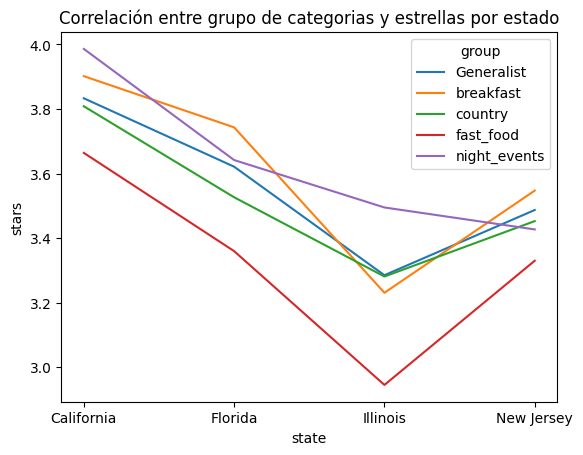

In [47]:
sns.lineplot(data=group_stars,hue='group',y='stars',x='state')
plt.title('Correlación entre grupo
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          
          de categorias y estrellas por estado')
plt.show()

In [ ]:

# generalist_categories = df_by[df_by['group'] == 'Generalist']['categories'].unique()
# generalist_categories = df_by[df_by['group'].apply(lambda x: 'Generalist' in x)]['categories'].unique()
# generalist_categories = df_by[df_by['group'].apply(lambda x: 'Generalist' in x if x is not None else False)]['categories'].unique()

# Filter rows where 'group' is 'Generalist'
generalist_rows = df_by[df_by['group'].apply(lambda x: 'Generalist' in x if x is not None else False)]

# Flatten the lists of categories and get unique categories
generalist_categories = pd.unique([category for sublist in generalist_rows['categories'] for category in sublist])
generalist_categories

/tmp/ipykernel_7556/3737035431.py:9: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  generalist_categories = pd.unique([category for sublist in generalist_rows['categories'] for category in sublist])


array(['Vietnamese', 'Food', 'Restaurants', 'Food Trucks', 'French',
       'Moroccan', 'Seafood', 'Mediterranean', 'Barbeque', 'Hawaiian',
       'Street Vendors', 'Sushi Bars', 'Japanese', 'Ethnic Food',
       'Specialty Food', 'Thai', 'Puerto Rican', 'Caribbean',
       'Latin American', 'Festivals', 'Arts & Entertainment',
       'Local Flavor', 'Food Stands', 'Kebab', 'Middle Eastern',
       'Lebanese', 'Greek', 'Asian Fusion', 'Chinese', 'Poke',
       'Acai Bowls', 'Pretzels', 'Bakeries', 'Delis', 'Peruvian', 'Vegan',
       'Wraps', 'Salad', 'Steakhouses', 'Gluten-Free', 'Fast Food',
       'Chicken Shop', 'Chicken Wings', 'Teppanyaki', 'Szechuan',
       'Noodles', 'Diners', 'Falafel', 'Halal', 'Grocery',
       'Do-It-Yourself Food', 'Seafood Markets', 'Turkish', 'German',
       'Korean', 'Hot Pot', 'Indian', 'Pakistani', 'Vegetarian',
       'Custom Cakes', 'Meat Shops', 'Buffets', 'International Grocery',
       'Arabic', 'Bagels', 'Hot Dogs', 'Active Life', 'Golf',
    

# 3

In [ ]:
# 3

KPIs:

Enfoque técnico: Optimización del alcance y calidad del servicio      

KPI 1: Mejorar un 10% la accesibilidad de los restaurantes en Florida      
Métricas: Cantidad de restaurantes por estado cada 1000 habitantes        
    business_google.json.gz         

KPI 2: Aumento 5% rating promedio por grupo de categorías 
Métricas: correlación entre group y stars a través del tiempo  
    business_yelp.json.gz  


Enfoque orgánico: Networking            

KPI 3: Mejorar la tasa de diferencia entre reviews y respuestas 
"Aumentar la calidad de la comunicación a través de un mejor ratio respuestas por comentarios y  disminuir el tiempo promedio de respuestas"

kpi = (ratio respuestas/review * rango tiempo) + sentiment_resp promedio

Métricas: respuesta/review, tiempo promedio y sentiment_resp promedio
    se puede hacer con: business_id, resp time != 0, sentiment_score !=0, date             
    reviews_google.parquet.gz           

KPI 4: Aumentar 5% la tasa de retención de cliente            
Métricas: count distinct usuario con reviews > 1
    reviews_google.parquet.gz           
segun distribucion de datos, x > 1 es valido para decir que es cliente habitual?           
establecer rangos

Aumentar 10% reviews de usuarios poco influyentes y 1% muy influyente            
Métricas: Cantidad de usuarios inluyentes y poco influyentes         
    users_yelp.parquet.gz 
    rango influencia: 

    
metricas        
ratio useful/review-count       
distribucion de reviews por mes

Sistema de recomendación para empresas: Análisis de ubicación       
    Por cantidad competencia en la zona     
    Por calidad competencia en la zona      
    Por horario por atributo            
Sistema de recomendación para empresas: Publicidad      
    Promoción por gustos del usuario        
    Por gustos de usuarios similares        
    Por gustos de amigos del usuario        
